In [1]:
import pandas as pd
import numpy as np 

from pathlib import Path

In [2]:
from pattern.metrics import intertextuality

In [3]:
from gensim.parsing.preprocessing import strip_punctuation, strip_numeric, strip_short

In [4]:
docdir = Path('../data/docs')

In [5]:
raw_corpus = []

In [6]:
files = list(docdir.glob('*.body'))
for f in files:
    with open(f, 'r') as fp:
        raw_corpus.append(fp.read())
        fp.close()

In [15]:
# results of the plagiarism check are definitely sensitive to the amount of preprocessing done
# corpus = [ strip_punctuation(doc.lower()) for doc in raw_corpus ]
corpus = [ strip_short(strip_numeric(strip_punctuation(doc.lower()))) for doc in raw_corpus ]

In [16]:
# the smaller the n-gram level passed to the plagiarism checker, the slower it runs
# and perhaps a bit less useful (interacts with preprocessing above)
plag_check = intertextuality(corpus, n=3)

In [17]:
type(plag_check)

collections.defaultdict

In [18]:
%matplotlib inline
values = list(plag_check.values())
len(values)

648396

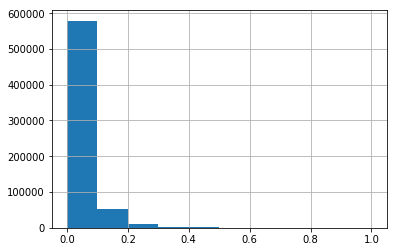

In [19]:
values = pd.Series(values)
values.hist()

In [20]:
values.describe()

count    648396.000000
mean          0.045694
std           0.061933
min           0.000375
25%           0.011429
50%           0.025424
75%           0.055556
max           1.000000
dtype: float64

In [21]:
original = []
for i in range(len(corpus)):
    plag_weight =  max([plag_check[i,j] for j in range(len(corpus)) if j != i ])
    if plag_weight < 0.015:
        original.append((i, plag_weight))

In [22]:
len(original)

1

In [23]:
for idx,weight in original:
    print('\n-------- weight =  ', weight)
    print(raw_corpus[idx])


-------- weight =   0.009345794392523364
410.No timber sale in Alaska’s Region 10 shall be advertised if the indicated rate is deficit (defined as the value of the timber is not sufficient to cover all logging and stumpage costs and provide a normal profit and risk allowance under the Forest Service’s appraisal process) when appraised using a residual value appraisal. The western red cedar timber from those sales which is surplus to the needs of the domestic processors in Alaska, shall be made available to domestic processors in the contiguous 48 United States at prevailing domestic prices. All additional western red cedar volume not sold to Alaska or contiguous 48 United States domestic processors may be exported to foreign markets at the election of the timber sale holder. All Alaska yellow cedar may be sold at prevailing export prices at the election of the timber sale holder.
